In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
%matplotlib inline

In [2]:
#读取数据内容
train=pd.read_csv('Desktop/titanic/train.csv')
test=pd.read_csv('Desktop/titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#根据以上数据可以看到，数据集中共有12个字段，891条记录。字段包括乘员姓名、性别、年龄、船舱、获救情况。但是数据并没有展示乘客的幸存情况通过建模来预测生还几率。
#接下来准备清理数据并处理缺失值和异常值。
train.isnull().sum()
#可以看到Age，Cabin及Embarked列各有数量不等的缺失值需要处理

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()
#同样在age，cabin也存在缺失值

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
#清洗数据,使用中位数填充Age，Fare的缺失值，使用众数填充Embarked的缺失值（因为Embarked属于分类型的数据）。
train_copy = train.copy(deep = True)
data_clean = [test, train_copy]

for data in data_clean:
    data['Age'].fillna(data['Age'].median(), inplace = True)
    data['Fare'].fillna(data['Fare'].median, inplace = True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

drop_columns = ['PassengerId','Cabin','Ticket']
train_copy.drop(drop_columns, axis=1, inplace = True)


In [15]:
train_copy.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Age2        0
dtype: int64

In [16]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [23]:
#分析基本情况，先来看一下生存比例。

train_copy['Age'].describe()


count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

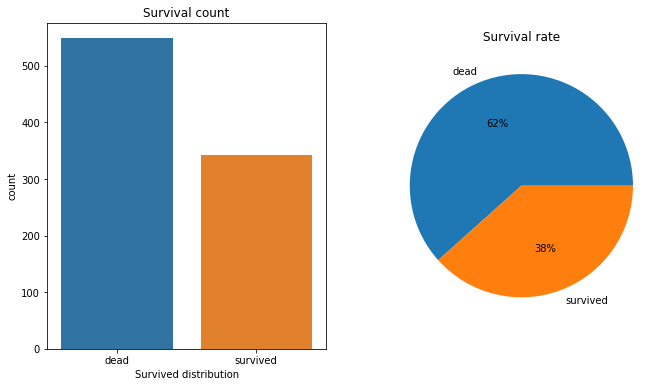

In [28]:
#使用柱状图和饼状图来直观的观察生还率状况。
Survived = train_copy['Survived'].sum()
Dead = 891- Survived
train_copy['Survived_cat'] = train_copy['Survived'].map({0:"dead",1:"survived"})

plt.figure(figsize = (11,6))
plt.subplot(1,2,1)
sns.countplot(x='Survived_cat', data=train_copy)
plt.xlabel("Survived distribution")
plt.title('Survival count')

plt.subplot(1,2,2)
plt.pie([Dead, Survived],labels=['dead','survived'],autopct='%1.0f%%')
plt.title('Survival rate') 

plt.show()

#可以看到有62%的人去世，38%的人存活了下来。

In [29]:
#接下来，观察一下各因素对生存率的影响。
#使用pivot函数来观察数据分布。
#首先来看Pclass的人数分布。

train_copy.pivot_table(index = "Pclass", values = "Name", aggfunc = "count")


,Name
Pclass,
1,216
2,184
3,491


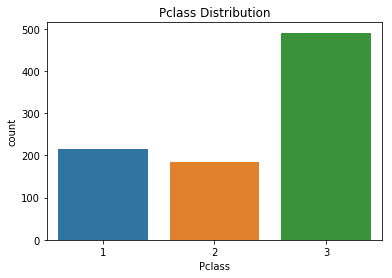

In [31]:
#通过图表来直观观察。

plt.figure()
sns.countplot(x='Pclass', data=train_copy)
plt.title('Pclass Distribution')

plt.show()

In [32]:
#同样的方法查看生存人数与舱位之间的关联。

train_copy.pivot_table(index = "Survived", values = 'Pclass', aggfunc = np.mean)

,Pclass
Survived,
0,2.531876
1,1.950292


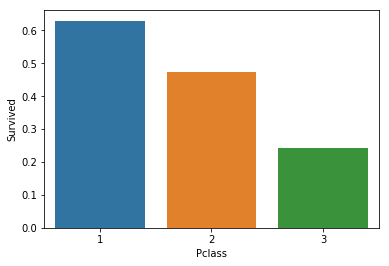

In [33]:
plt.figure()
sns.barplot(data=train_copy, x="Pclass",y="Survived",ci=None)

plt.show()
#可以看出随着舱位等级的升高，生存率也在随之升高。

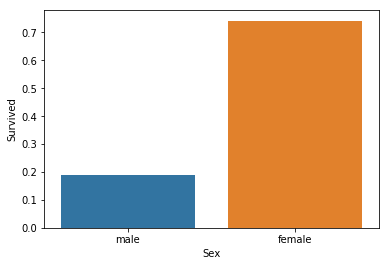

In [35]:
#同样的方法观察性别与生存率的关系。
train_copy.pivot_table(index = "Sex", values = "Survived", aggfunc = np.mean)

plt.figure()
sns.barplot(data=train_copy, x="Sex",y="Survived",ci=None)

plt.show()
#可以看到女性生存率远远高于男性。

In [48]:
#年龄与生存率的关系。
#因为年龄属于连续变量所以需要使用将其离散化进行分析。

train_copy["AgeGroup"]=pd.cut(train_copy["Age"],5)
train_copy.AgeGroup.value_counts(sort=False)






(0.34, 16.336]      100
(16.336, 32.252]    523
(32.252, 48.168]    188
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: AgeGroup, dtype: int64

In [49]:
train_copy.pivot_table(index="AgeGroup",values="Survived",aggfunc=np.mean)


,Survived
AgeGroup,
"(0.34, 16.336]",0.550000
"(16.336, 32.252]",0.344168
"(32.252, 48.168]",0.404255
"(48.168, 64.084]",0.434783
"(64.084, 80.0]",0.090909


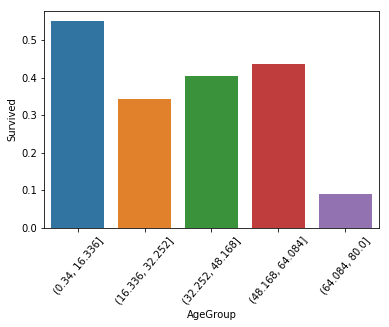

In [50]:
plt.figure()
sns.barplot(data=train_copy,x="AgeGroup",y="Survived",ci=None)
plt.xticks(rotation=50)

plt.show()
#可以看到儿童的生存率最高，老人最低。

In [54]:
#在单一的条件下分析数据得到的结果可能还不太准确，接下来结合多个因素分析数据。
#下面是性别、年龄、舱位三个条件下与生还率的数据分析结果。

train_copy.pivot_table(index="AgeGroup",columns=["Sex","Pclass"],values="Survived",aggfunc=np.mean)


Sex                 female                          male                    
Pclass                   1         2         3         1         2         3
AgeGroup                                                                    
(0.34, 16.336]    0.833333  1.000000  0.545455  1.000000  0.818182  0.270270
(16.336, 32.252]  0.975610  0.921053  0.521277  0.354167  0.087719  0.138776
(32.252, 48.168]  1.000000  0.909091  0.250000  0.435897  0.074074  0.055556
(48.168, 64.084]  0.941176  0.833333  1.000000  0.269231  0.090909  0.000000
(64.084, 80.0]         NaN       NaN       NaN  0.166667  0.000000  0.000000

/Users/apple/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/apple/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/apple/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/apple/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorte

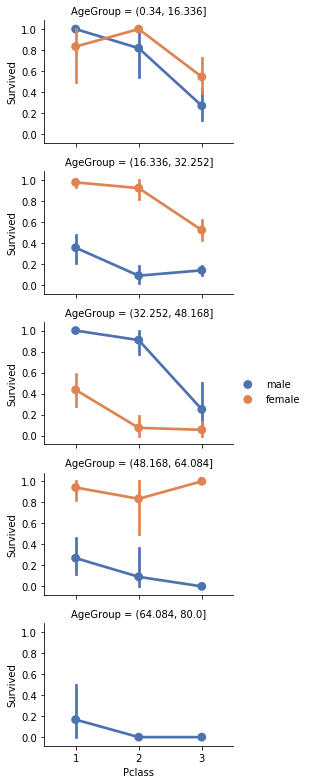

In [69]:
g = sns.FacetGrid(train_copy, row = 'AgeGroup',size=2.2, aspect=1.6)
g.map(sns.pointplot,"Pclass","Survived","Sex",palette='deep')
g.add_legend()


In [70]:
#接下来是Sex，PClass及Embark和生存率的关系。
train_copy.pivot_table(index="Sex",columns=["Pclass","Embarked"],values="Survived",aggfunc=np.mean)

Pclass           1                  2                        3            \
Embarked         C    Q        S    C    Q         S         C         Q   
Sex                                                                        
female    0.976744  1.0  0.96000  1.0  1.0  0.910448  0.652174  0.727273   
male      0.404762  0.0  0.35443  0.2  0.0  0.154639  0.232558  0.076923   

Pclass              
Embarked         S  
Sex                 
female    0.375000  
male      0.128302

/Users/apple/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/apple/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/apple/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/apple/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorte

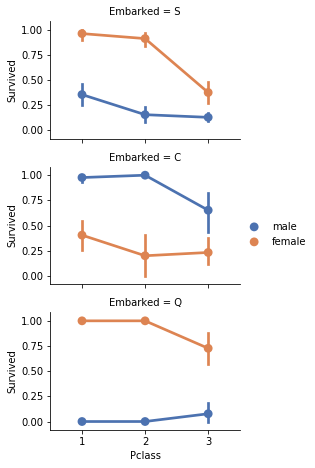

In [71]:
g = sns.FacetGrid(train_copy, row = 'Embarked',size=2.2, aspect=1.6)
g.map(sns.pointplot,"Pclass","Survived","Sex",palette='deep')
g.add_legend()


In [ ]:
#由此，根据数据分析得出结果：
#1.女性的生存率高于男性，传说中泰坦尼克号登上气垫船的女士优先看来确有其事。
#2.可以看到年龄越小，生存率越高，老人基本无人生还。
#3.可以看到从C港口登船的人生还率最高，Q上船的次之，S上船生还率 最低。
#4.根据PClass与生还率的图表也可看出船舱等级越高生存率也越高，说明生还率与乘客的贫富程度成正比。
